## Problem 1c: 
## Fixed flux spinodal decomposition on a T shaped domain

Necessary imports for graphing and PDE solving:

In [48]:
%matplotlib inline
import fipy as fp
import numpy as np
import sympy
import matplotlib.pyplot as plt

The square domain of the problem has dimensions 20 units by 20 units, with cells that are half a unit long on each side. A Grid2D object is used because the domain's boundary conditions are fixed (no flux).

In [49]:
mesh = fp.Grid2D(dx=0.5, dy=0.5, nx=40, ny=200) + (fp.Grid2D(dx=0.5, dy=0.5, nx=200, ny=40) + [[-40],[100]])

Constants and initial conditions:
$c_{\alpha}, c_{\beta},$ and $c_m = \frac{(c_{\alpha} + c_{\beta})}{2}$ are concentrations at which the bulk free energy has minima.
$\kappa$ is the gradient energy coefficient.

In [50]:
c_alpha = 0.05
c_beta = 0.95
c_m = (c_alpha + c_beta) / 2.
# control on height of double-well barrier
A = 2.0
kappa = 2.0

B = A / (c_alpha - c_m)**2
D = D_alpha = D_beta = 2. / (c_beta - c_alpha)

# initial conditions
c_0 = 0.45
q = np.sqrt((2., 3.))
epsilon = 0.01

$c_{var}$ is a cell variable specifying concentrations at various points in the mesh. Here, it is the solution variable:

$c_{var}\left(\vec{r}, t\right)$ such that

$$ c_{var}\left(\vec{r}, 0\right) = \bar{c}_0 + \epsilon \cos \left( \vec{q} \cdot \vec{r} \right) $$

In [51]:
# array of sample c-values: used in f versus c plot
vals = np.linspace(-.1, 1.1, 1000)

# setting up the concentration field
c_var = fp.CellVariable(mesh=mesh, name=r"$c$", hasOld=True)
r = np.array((mesh.x, mesh.y))
c_var[:] = c_0 + epsilon * np.cos((q[:, None] * r).sum(0))

# viewer = fp.Viewer(c_var, limits = {'ymin': 0, 'ymax': 20},
#                     datamin=.440, datamax =.460,
#                     title = "Matplot2DViewer test")

The equation for the bulk free energy density (alternatively called the chemical free energy density) of this system is expressed as 
$$ \int\limits_V{\!\Big(f_{chem}+\frac{\kappa}{2}{\big|\nabla c\big|}^2}\Big)\,\mathrm{d}V.$$ Also, $f_{chem}$ or $f_0$ in this problem has a simple polynomial form, $$ f_0  = -\frac{A}{2}(c-c_m)^2 +\frac{B}{4}(c-c_m)^4 + \frac{c_{\alpha}}{4}(c-c_{\alpha})^4 + \frac{c_{\beta}}{4}(c-c_{\beta})^4.$$

In [52]:
# bulk free energy density
def f_0(c):
    return - A / 2 * (c - c_m)**2 + B / 4 * (c - c_m)**4+ c_alpha / 4 * (c - c_alpha)**4 + c_beta / 4 * (c - c_beta)**4
def f_0_var(c_var):
    return -A + 3*B*(c_var - c_m)**2 + 3*c_alpha*(c_var - c_alpha)**2 + 3*c_beta*(c_var - c_beta)**2
    #return sympy.diff(f_0(c), c, 2)
# free energy
def f(c):
    return (f_0(c)+ .5*kappa*(c.grad.mag)**2)

# plot free energy density versus c
def plotf_c():
    plt.figure(1)
    plt.xlabel('c')
    plt.ylabel('f_0')
    plt.plot(vals, f_0(vals))
    plt.show()


Here, the elapsed time and total free energy at each time step are saved to separate lists. These lists are then updated in a text file.

In [53]:
# save elapsed time and free energy at each data point
f_data = []
time_data = []

def save_data(f, time):
    f_data.append(f.value)
    time_data.append(time)
    np.savetxt('1cfree_energy.txt', zip(time_data, f_data))

The solver equation is now defined.

In [54]:
# start solver
eqn = fp.TransientTerm(coeff=1.) == fp.DiffusionTerm(D * f_0_var(c_var)) - fp.DiffusionTerm((D, kappa))

A time stepping scheme is used to solve the equation. If the residual increases, the solver backtracks; if the specified tolerance is not reached, the time step is recalculated.

In [55]:
elapsed = 0.0
steps = 0
dt = 0.01
total_sweeps = 2
tolerance = 1e-1
total_steps = 1000

In [56]:
c_var.updateOld()
from fipy.solvers.pysparse import LinearLUSolver as Solver
solver = Solver()

Initialize an empty list for generated viewers:

In [57]:
viewers = []

10
0.15937424601
20
0.572749994933
30
1.64494022689
40
4.42592555682
50
11.639085288
60
17.0363260376
70
19.9190218742
80
22.5946531601
90
24.9725141998
100
27.2332543096
110
29.3335354156
120
31.24193871
130
33.0550209242
140
34.8177273667
150
36.6484415374
160
38.4676874056
170
40.2750330682
180
42.0312207591
190
43.8554810033
200
45.5892514939
210
47.2364668406


/users/and9/miniconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


220
48.8732131906
230
50.5736302529
240
52.1897431651
250
53.8315240162
260
55.4627188592
270
57.1209474465
280
58.8826443764
290
60.5558617723
300
62.2182904611
310
63.9844495658
320
65.7016237047
330
67.4452842289
340
69.2977437848
350
71.2224442685
360
73.1347345118
370
74.8347548212
380
76.2796318824
390
77.683957106
400
79.0477219579
410
80.3728497663
420
81.6901044627
430
82.9983518584
440
84.2982845929
450
85.6192197266
460
86.9616969953
470
88.2949944931
480
89.6198181219
490
90.9660463004
500
92.2741687061
510
93.6030673866
520
94.9233974861
530
96.2358829786
540
97.5393937819
550
98.8346200278
560
100.150772632
570
101.429670771
580
102.728881029
590
104.019714134
600
105.361068208
610
106.664454474
620
107.988541793
630
109.333844471
640
110.731480474
650
112.152279457
660
113.766546684
670
115.602776581
680
117.781125825
690
119.680805844
700
121.324865569
710
122.785958354
720
124.205849295
730
125.554854922
740
126.895286847
750
128.28786262
760
129.703517512
770
131.2419

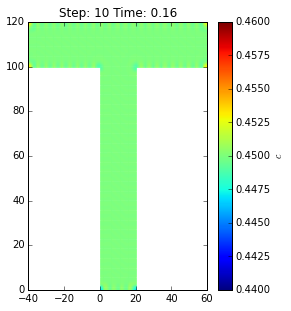

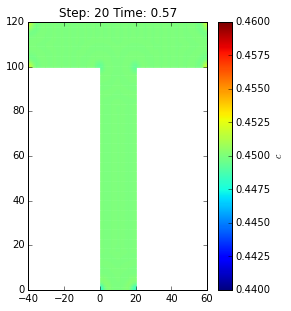

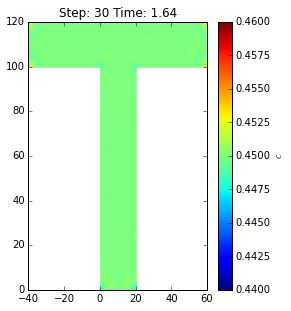

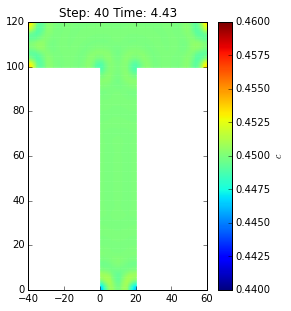

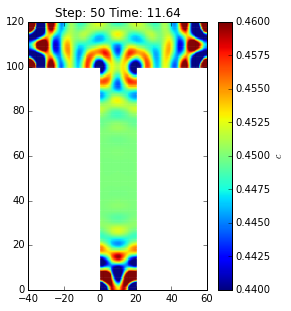

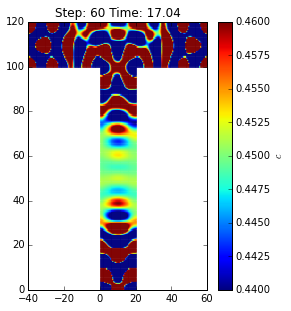

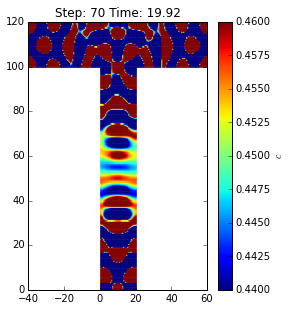

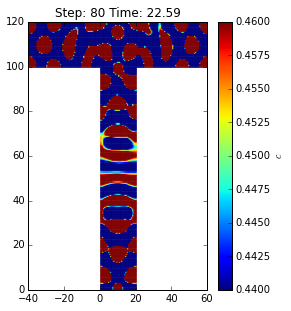

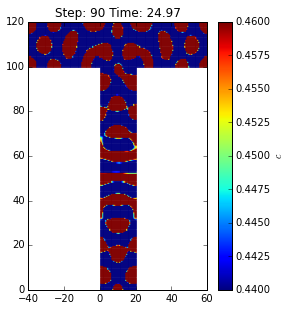

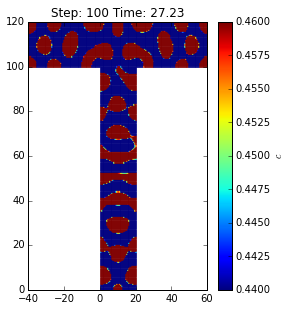

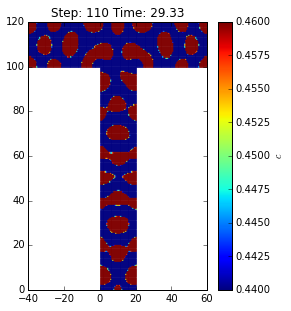

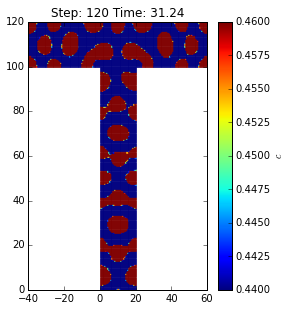

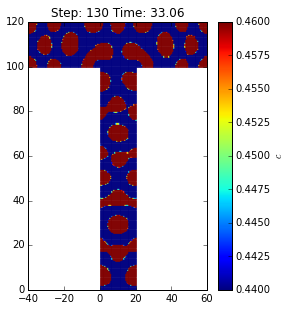

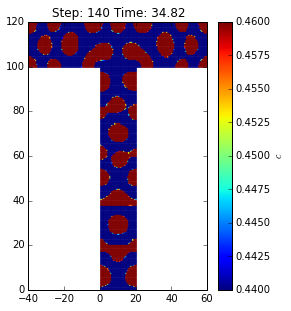

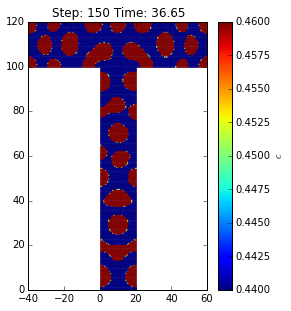

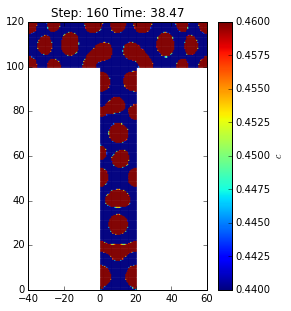

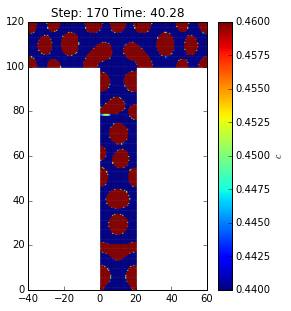

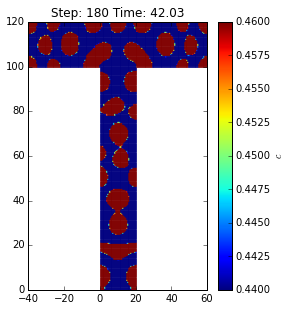

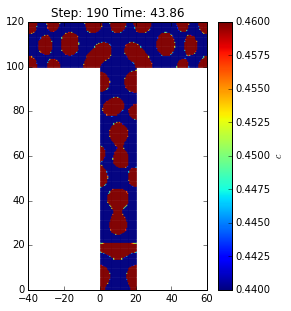

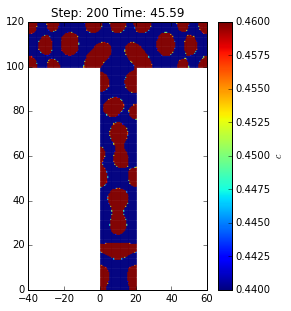

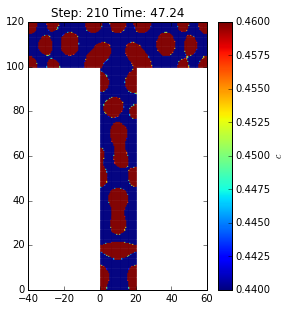

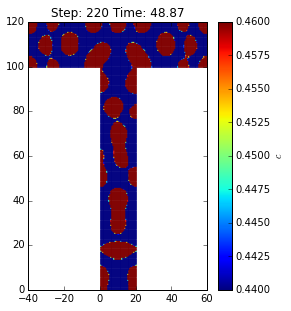

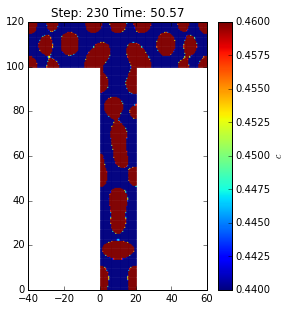

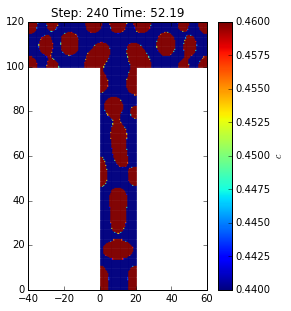

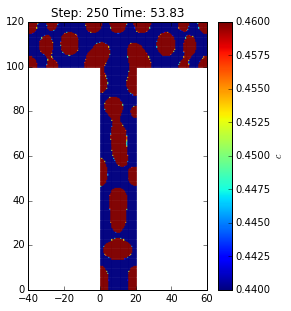

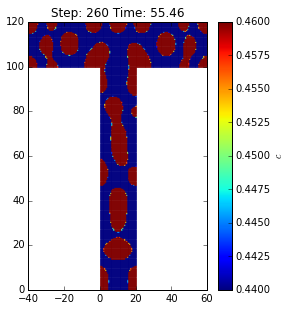

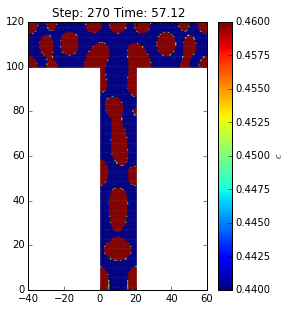

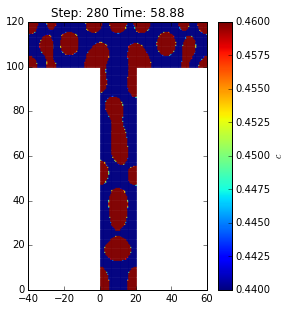

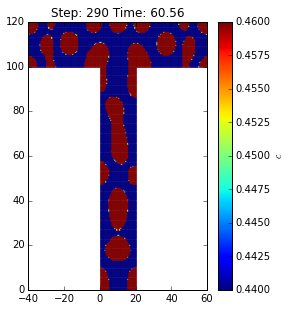

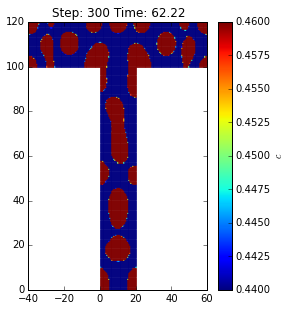

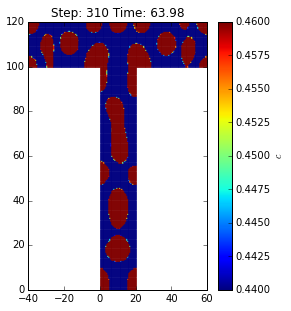

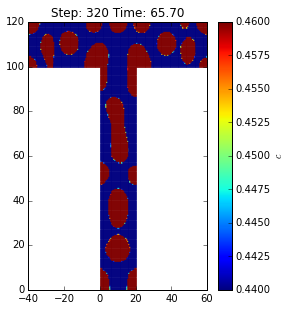

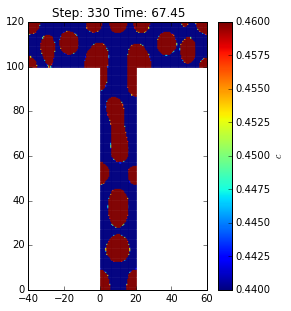

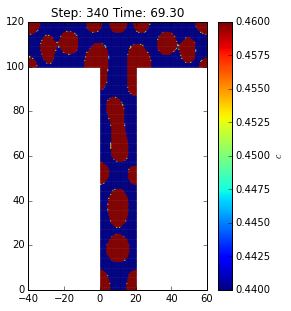

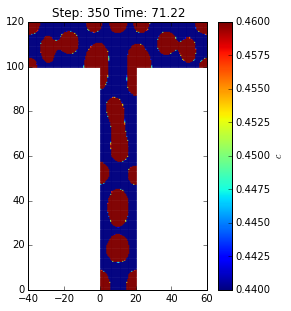

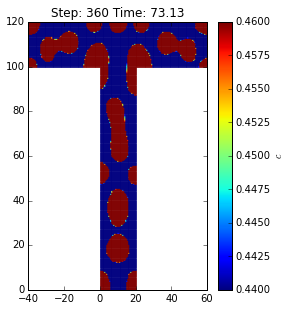

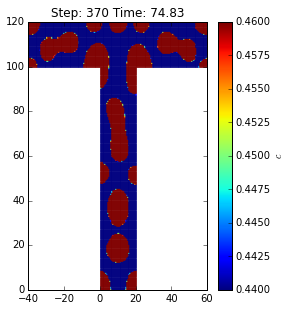

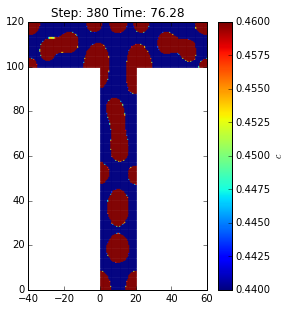

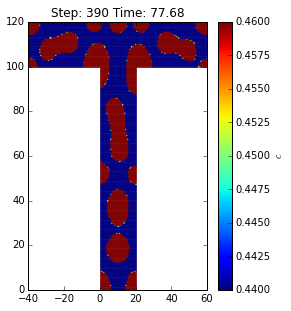

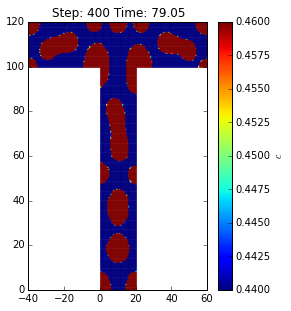

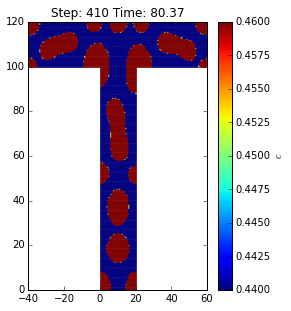

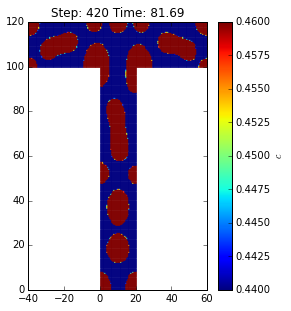

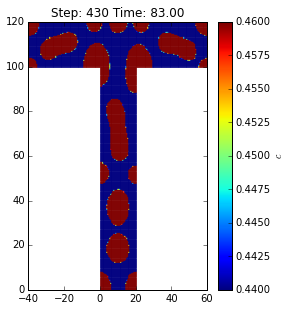

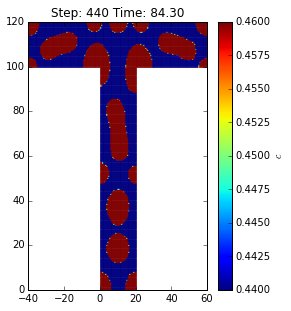

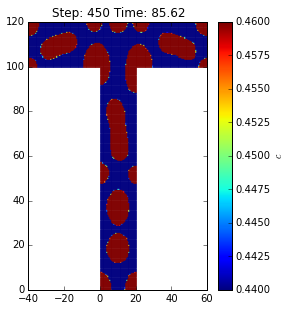

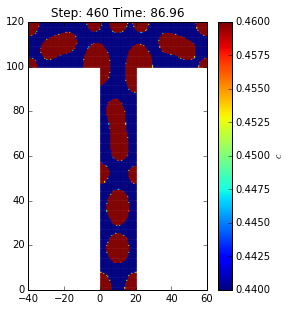

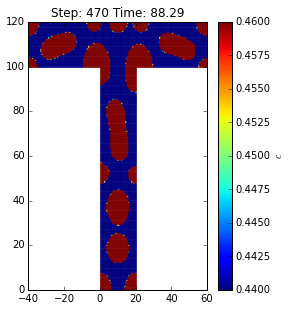

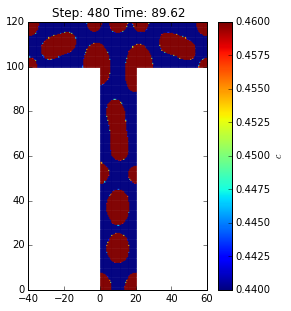

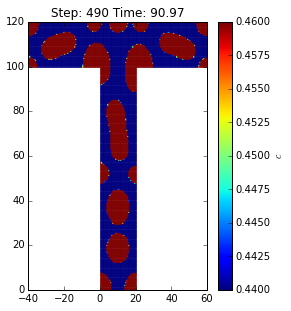

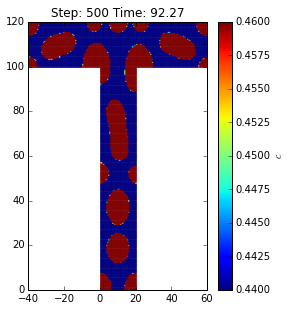

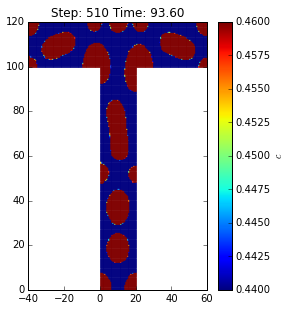

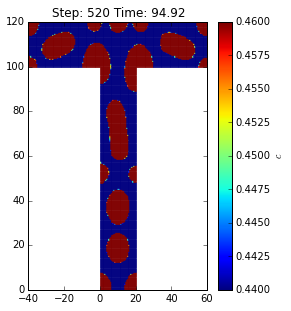

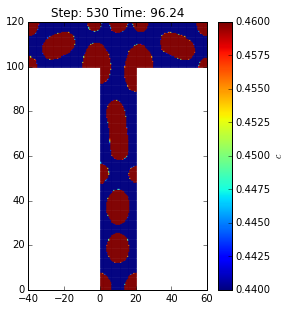

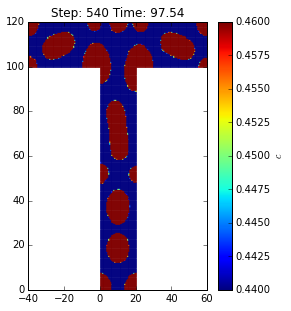

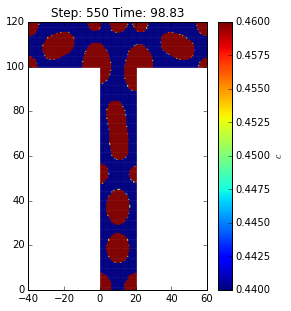

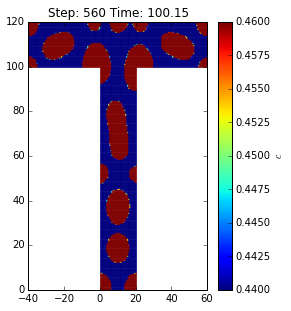

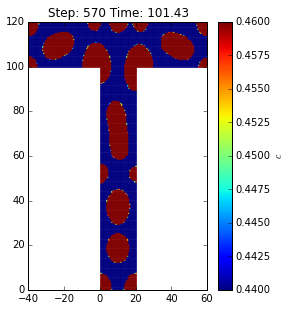

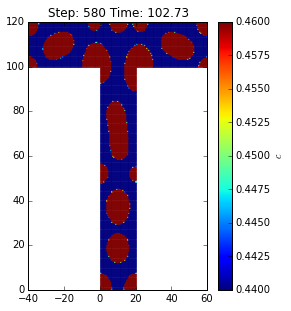

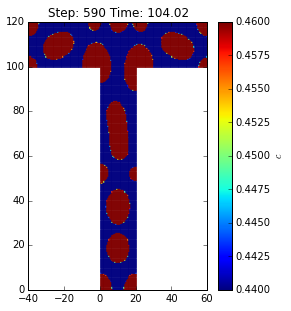

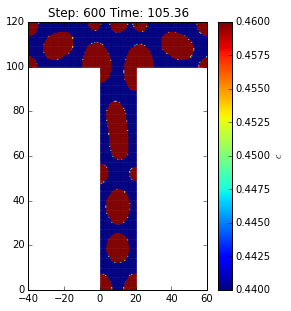

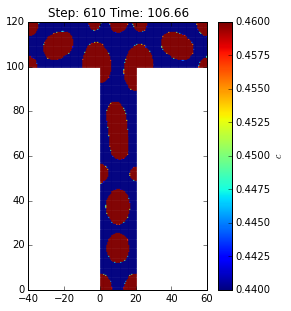

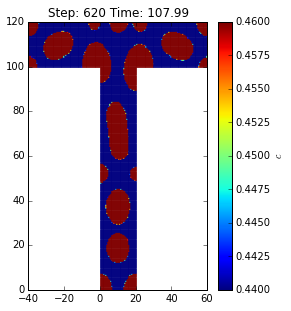

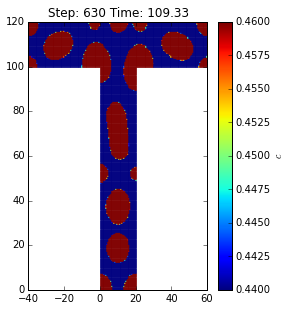

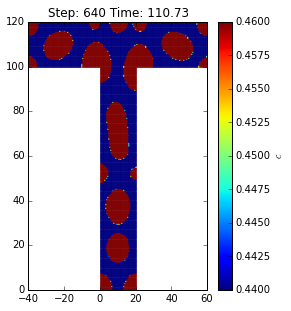

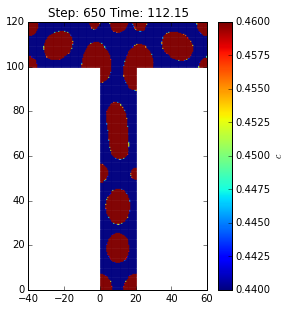

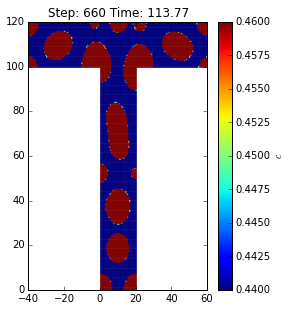

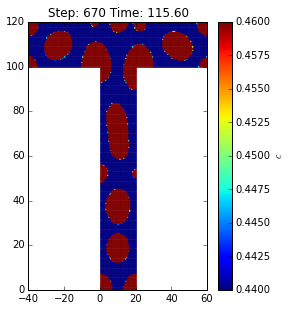

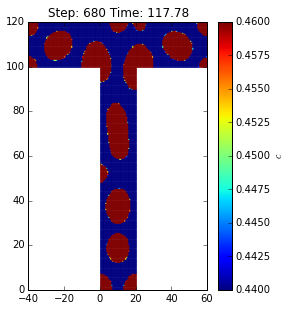

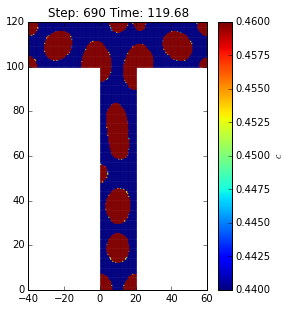

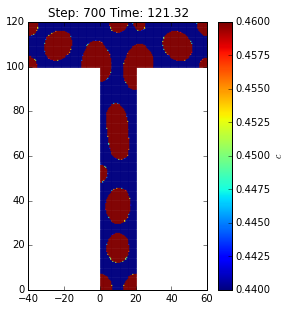

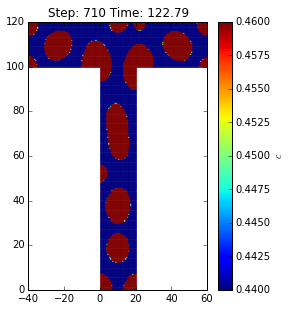

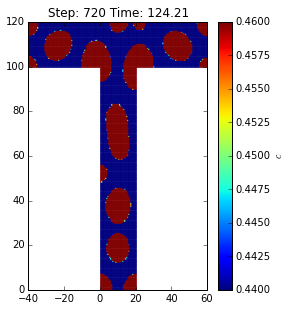

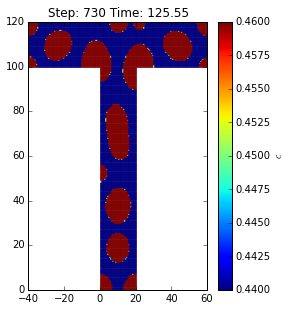

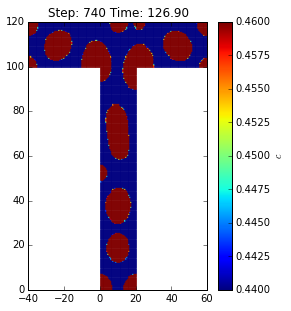

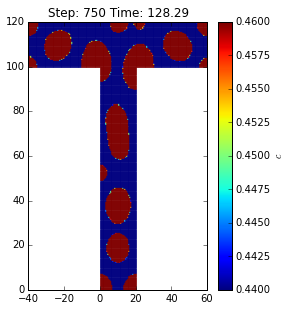

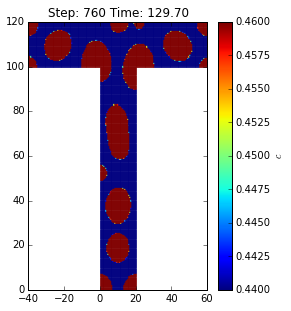

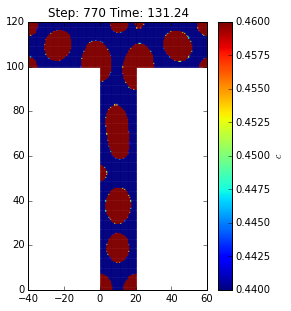

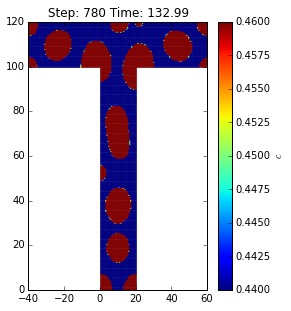

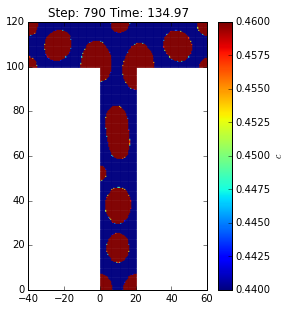

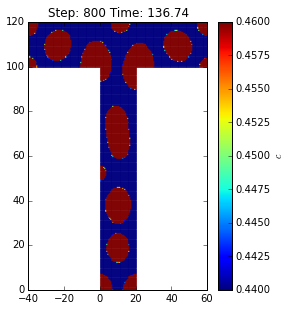

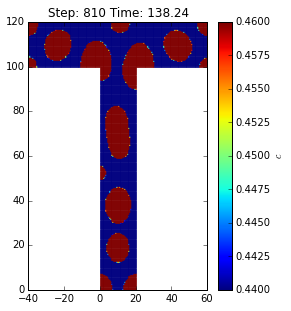

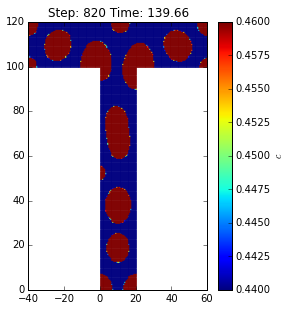

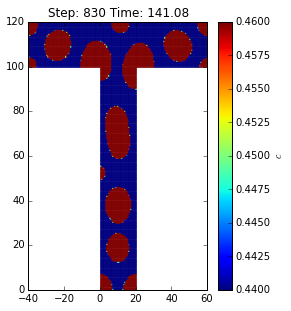

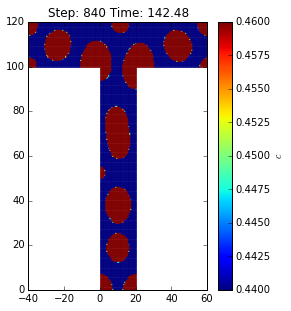

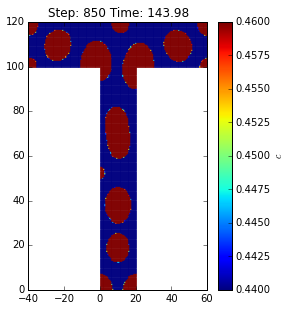

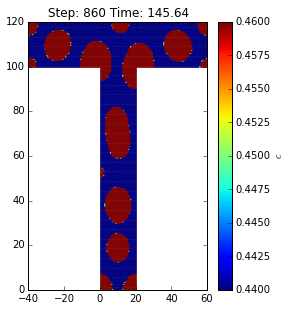

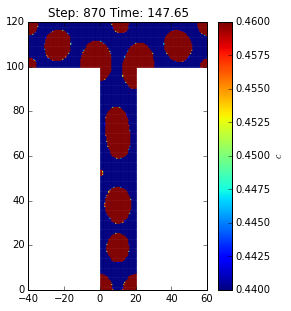

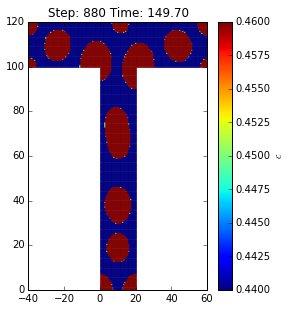

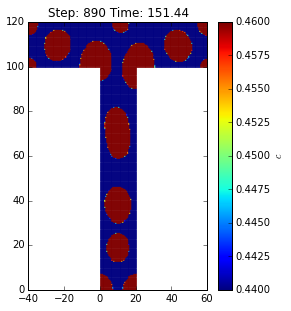

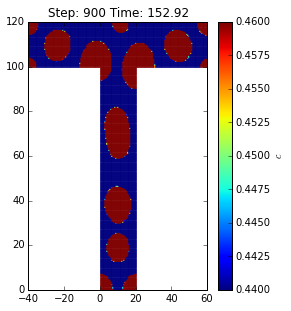

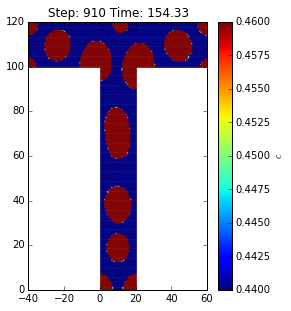

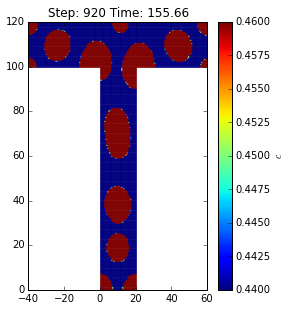

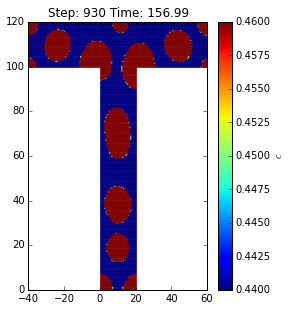

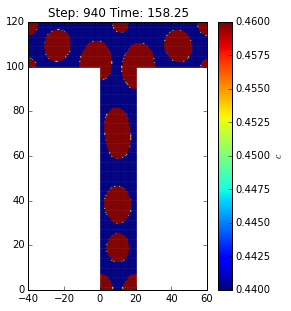

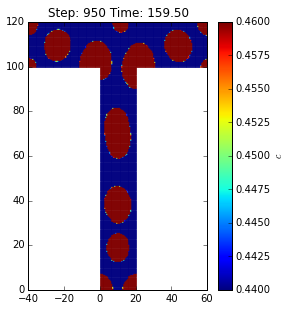

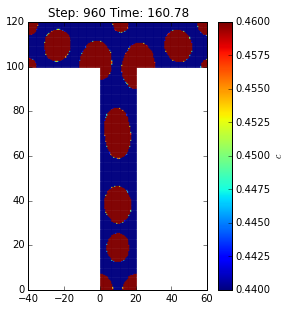

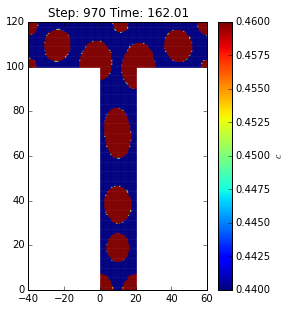

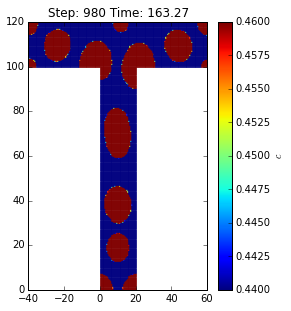

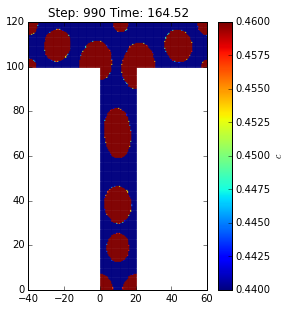

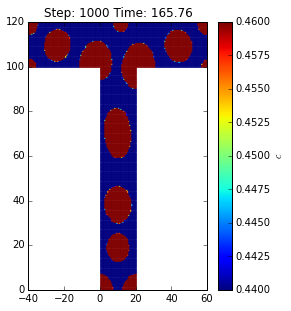

In [58]:
while steps < total_steps:
    res0 = eqn.sweep(c_var, dt=dt, solver=solver)

    for sweeps in range(total_sweeps):
        res = eqn.sweep(c_var, dt=dt, solver=solver)

#         print ' '
#         print 'steps',steps
#         print 'res',res
#         print 'sweeps',sweeps
#         print 'dt',dt


    if res < res0 * tolerance:
        steps += 1
        elapsed += dt
        dt *= 1.1
        
        if (steps%(total_steps/100)==0):
            print steps
            print elapsed
            # record the volume integral of the free energy 
            save_data(f(c_var).cellVolumeAverage*mesh.numberOfCells, elapsed)
            # pickle the data on c as a function of space at this particular time
            fp.dump.write({'time' : elapsed, 'var': c_var}, '1cpickles/1c{0}.pkl'.format(steps))
            # create a viewer based on the pickled data
            viewers.append(fp.Viewer((fp.dump.read('1cpickles/1c{0}.pkl'.format(steps))['var']),
                        limits = {'ymin': 0.0, 'ymax': 120.0},
                        datamin=.440, datamax =.460,
                        title = 'Step: {0} Time: {1}'.format(steps, "%0.2f" %elapsed)))
        c_var.updateOld()
    else:
        dt *= 0.8
        c_var[:] = c_var.old

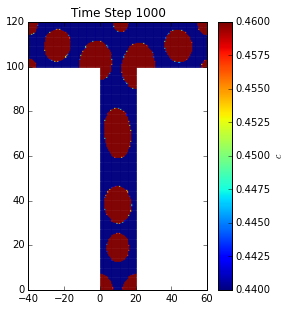

In [34]:
fp.MultiViewer(viewers).plot()

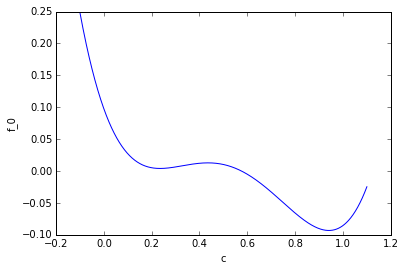

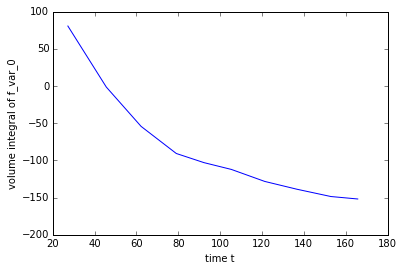

In [35]:
plotf_c()

plt.figure(3)
plt.xlabel('time t')
plt.ylabel('volume integral of f_var_0')
plt.plot(time_data, f_data)
plt.show()